In [1]:
from array import array
import math
import numpy as np
from scipy.fftpack import fft
import random

In [2]:
fs = 0.2
phis = math.pi/4.0
tseries = 50.0

random.seed(1)

In [3]:
#N_max = 513  #power of 2 plus 1
#N_start = 32 #power of 2
#N_max = 513  #power of 2 plus 1
#N_start = 460 #power of 2
N_max = 80  #power of 2 plus 1
N_start = 32 #power of 2
btime = np.zeros(N_max)
ptime = np.zeros(N_max)
time_ratio = np.zeros(N_max)
Npoints = np.zeros(N_max)

for N in range(N_start,N_max):
    
    Npoints[N] = N

    tau = tseries/N
    t = np.zeros(N)
    y = np.zeros(N)
    f = np.zeros(N)

    ytReal = np.zeros(N)
    ytImag = np.zeros(N)

    yfftReal = np.zeros(N)
    yfftImag = np.zeros(N)

    power = np.zeros(N)
    powerfft = np.zeros(N)
    
    for i in range(N):
        t[i]=i*tau
        y[i]=(math.sin(2.0*math.pi*t[i]*fs+phis))
        f[i]=i/(N*tau)
    
    from timeit import default_timer as timer

    start = timer()

    twopiN=-2.0*math.pi/N
    epsilon = 0.001
    for k in range(N):
        ytReal[k]=epsilon
        ytImag[k]=epsilon
        for j in range(N):
            ytReal[k] = ytReal[k] + 1.0/N*y[j]*math.cos(twopiN*j*k)
            ytImag[k] = ytImag[k] + 1.0/N*y[j]*math.sin(twopiN*j*k)   
        power[k]=2*(ytReal[k]**2+ytImag[k]**2)
    
    end = timer()
    btime[N] = end-start
    #print ("Brash: ",btime[N])
        
    start = timer()
    yfft = fft(y)
    yfftReal = 1.0/N*yfft.real
    yfftImag = 1.0/N*yfft.imag
    powerfft = 2.0/(N*N)*abs(yfft)**2
    end = timer()
    ptime[N]=end-start
    time_ratio[N] = btime[N]/ptime[N]
    
    #print ("Python: ",ptime[N])
    print("Ratio = ",N,btime[N]/ptime[N])

Ratio =  32 27.53819384521041
Ratio =  33 43.949369788177734
Ratio =  34 83.88467648454674
Ratio =  35 71.78522021871113
Ratio =  36 80.1427890255821
Ratio =  37 110.43371357297778
Ratio =  38 84.12647327882915
Ratio =  39 69.37488362476402
Ratio =  40 95.95415700784064
Ratio =  41 83.08233640314843
Ratio =  42 122.72565646606125
Ratio =  43 42.83623841504759
Ratio =  44 107.27774341220422
Ratio =  45 92.85750596529606
Ratio =  46 113.18721692583051
Ratio =  47 66.26968487057376
Ratio =  48 109.4982471280871
Ratio =  49 113.78869015121175
Ratio =  50 138.29917096354131
Ratio =  51 62.86258022852656
Ratio =  52 142.8604006446192
Ratio =  53 134.6453778622516
Ratio =  54 154.09399004678892
Ratio =  55 173.0534475348011
Ratio =  56 164.76249645129136
Ratio =  57 143.16243545061218
Ratio =  58 192.68099562691717
Ratio =  59 243.4521168311844
Ratio =  60 214.50510187931545
Ratio =  61 181.19499802624486
Ratio =  62 212.46452886918127
Ratio =  63 213.93717277421234
Ratio =  64 195.8800943579

Welcome to JupyROOT 6.18/00


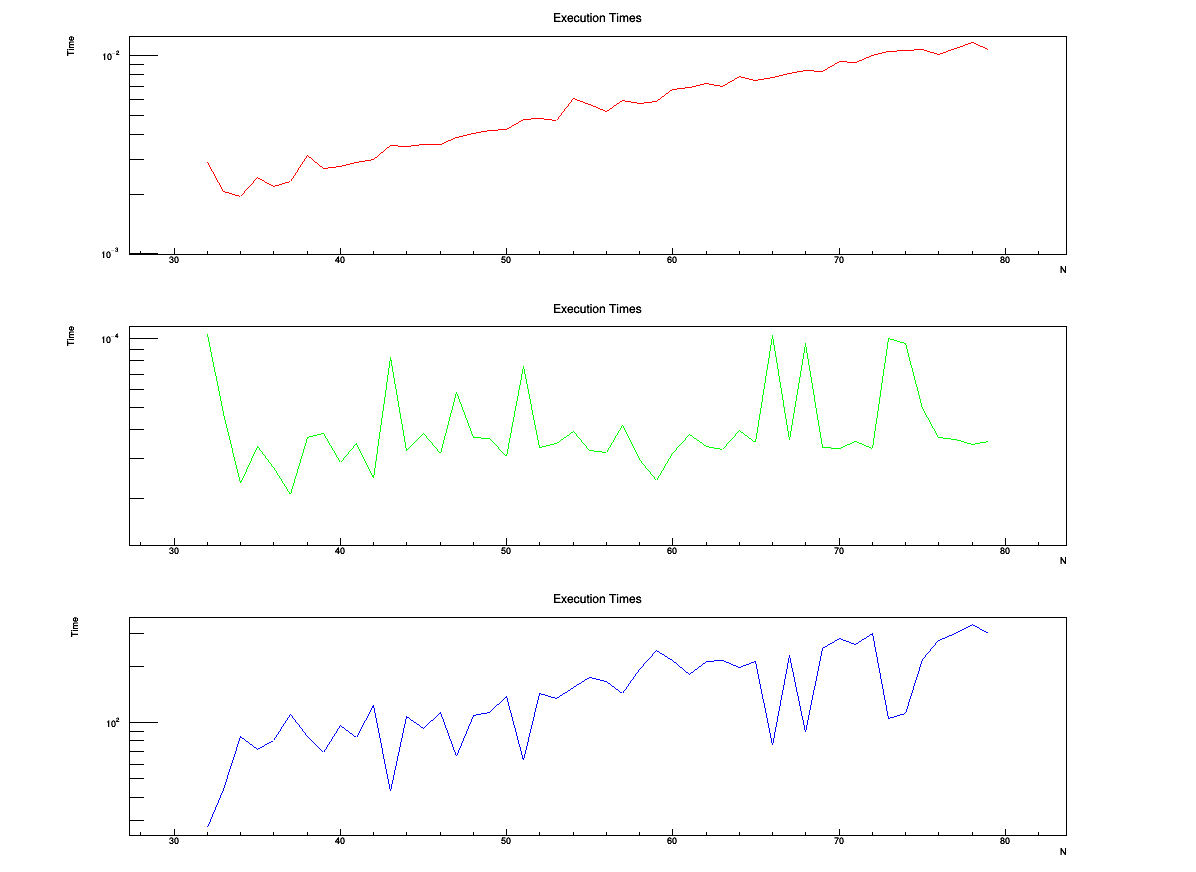

In [4]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle, gPad

gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Fourier Transform', 200, 10, 1200, 900 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(1,3)

c1.cd(1)
gPad.SetLogy()
gr = TGraph(N_max-N_start,Npoints[N_start:N_max],btime[N_start:N_max])
gr2 = TGraph(N_max-N_start,Npoints[N_start:N_max],ptime[N_start:N_max])
gr3 = TGraph(N_max-N_start,Npoints[N_start:N_max],time_ratio[N_start:N_max])
gr.SetMarkerStyle(22)
gr2.SetMarkerStyle(23)
gr3.SetMarkerStyle(24)
gr.SetLineColor(2)
gr2.SetLineColor(3)
gr3.SetLineColor(4)
gr.SetTitle("Execution Times")
gr.GetXaxis().SetTitle("N")
gr.GetYaxis().SetTitle("Time")
gr2.SetTitle("Execution Times")
gr2.GetXaxis().SetTitle("N")
gr2.GetYaxis().SetTitle("Time")
gr3.SetTitle("Execution Times")
gr3.GetXaxis().SetTitle("N")
gr3.GetYaxis().SetTitle("Time")
gr.Draw("AL")
c1.cd(2)
gPad.SetLogy()
gr2.Draw("AL")
c1.cd(3)
gPad.SetLogy()
gr3.Draw("AL")

c1.Draw()

In [5]:
lowlist = [461,463,467,479,487,491,499,503,509]
highlist = [464,468,480,484,490,504,510,512]

In [6]:
def get_factors(x):
    # This function takes a number and prints the factors

    factors = []
    for i in range(1, x + 1):
        if x % i == 0:
            factors.append(i)
            
    return factors
    

In [7]:
for x in lowlist:
    print (x,get_factors(x))

461 [1, 461]
463 [1, 463]
467 [1, 467]
479 [1, 479]
487 [1, 487]
491 [1, 491]
499 [1, 499]
503 [1, 503]
509 [1, 509]


In [8]:
for x in highlist:
    print (x,get_factors(x))

464 [1, 2, 4, 8, 16, 29, 58, 116, 232, 464]
468 [1, 2, 3, 4, 6, 9, 12, 13, 18, 26, 36, 39, 52, 78, 117, 156, 234, 468]
480 [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 16, 20, 24, 30, 32, 40, 48, 60, 80, 96, 120, 160, 240, 480]
484 [1, 2, 4, 11, 22, 44, 121, 242, 484]
490 [1, 2, 5, 7, 10, 14, 35, 49, 70, 98, 245, 490]
504 [1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 18, 21, 24, 28, 36, 42, 56, 63, 72, 84, 126, 168, 252, 504]
510 [1, 2, 3, 5, 6, 10, 15, 17, 30, 34, 51, 85, 102, 170, 255, 510]
512 [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
